In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# chargement du dataset
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:

X = df[['TV', 'Radio', 'Newspaper']].values

y = df['Sales'].values

In [5]:
X


array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [6]:
X.shape

(200, 3)

In [7]:
y.shape

(200,)

In [8]:
y=y.reshape(200,1)
y.shape

(200, 1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train  : ',X_train.shape)
print('y_train  : ',y_train.shape)

x_train  :  (160, 3)
y_train  :  (160, 1)


In [10]:
#normalisation
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

In [11]:
X = np.hstack((X_train[:, 0:1],X_train[:, 1:2],X_train[:, 2:3], X_train[:, 0:1]**2, X_train[:, 1:2]**2,X_train[:, 2:3]**2))

X_train = np.hstack((X,X_train[:, 0:1]*X_train[:, 1:2],X_train[:, 0:1]*X_train[:, 2:3],X_train[:, 2:3]*X_train[:,1:2]))
print('x_train avant  : ',X_train.shape)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
print('x_train apres : ',X_train.shape)

print(X_test.shape)
print(y_test.shape)

x_train avant  :  (160, 9)
x_train apres :  (160, 10)
(40, 3)
(40, 1)


In [12]:
np.random.seed(0)
theta = np.random.randn(10, 1)
print(theta.shape)

(10, 1)


In [13]:
def model(X, theta): # définir le modèle
    return X.dot(theta)

In [14]:
def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) 

In [15]:
cost_function(X_train, y_train, theta)

45.7094825150906

In [16]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) 

In [17]:

# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [18]:
# Entrainement du modèle
n_iterations = 1000
learning_rate = 0.01

#theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)


In [19]:
print(X_test.shape)

X = np.hstack((X_test[:, 0:1],X_test[:, 1:2],X_test[:, 2:3], X_test[:, 0:1]**2, X_test[:, 1:2]**2,X_test[:, 2:3]**2))
X_test = np.hstack((X,X_test[:, 0:1]*X_test[:, 1:2],X_test[:, 0:1]*X_test[:, 2:3],X_test[:, 2:3]*X_test[:,1:2]))

X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
print(X_test.shape)




(40, 3)
(40, 10)


In [20]:


predictions = model(X_test, theta_final)

theta_final


array([[ 6.09443369],
       [-1.05311216],
       [-0.85069534],
       [-0.048109  ],
       [ 1.01964965],
       [-0.31050311],
       [ 2.60594135],
       [ 0.41348628],
       [-0.54401271],
       [ 9.34936987]])

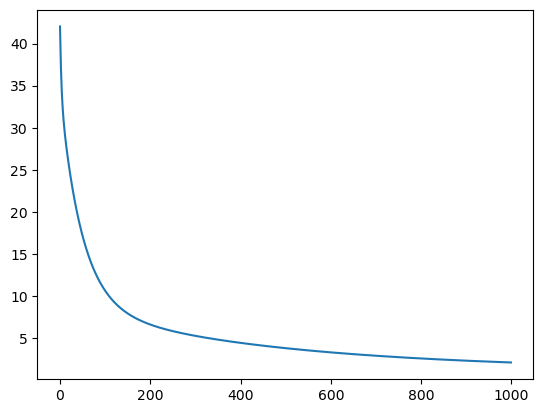

In [21]:
# Courbe d'apprentissage
plt.plot(range(n_iterations), cost_history)
plt.show()

In [22]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [23]:
coef_determination(y_test, predictions)

0.8236543526880802